In [4]:
import base64
#import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
from ollama import chat
from IPython.display import Image, display
import os
#import langchain
#from langchain.chat_models import ChatOpenAI

In [ ]:
vorlage_1= """You are an inspection system for gears. Please fill out the following template based on the provided image.

Schema:
1. General Description of the Gear
   • Shape/Form: [Description here]
   • Color/Material: [Description here]
   • Surface Structure: [Description here]
   • Condition of the Teeth: [Description here]

2. Categorization with Respect to Possible Defects
   1. Tooth Clipping
      • Observation: [Observation]
      • Localization: [Location where the issue occurs]
      • Assessment: [Evaluation]
   2. Surface Scratches
      • Observation: [Observation]
      • Localization: [Location where the issue occurs]
      • Assessment: [Evaluation]
   3. Wear Out
      • Observation: [Observation]
      • Localization: [Location where the issue occurs]
      • Assessment: [Evaluation]
   4. Rust
      • Observation: [Observation]
      • Localization: [Location where the issue occurs]
      • Assessment: [Evaluation]
   5. Production Errors
      • Observation: [Observation]
      • Localization: [Location where the issue occurs]
      • Assessment: [Evaluation]
   6. Dirt
      • Observation: [Observation]
      • Localization: [Location where the issue occurs]
      • Assessment: [Evaluation]

3. Summary
   • Overall Condition: [Summary]
   • Defect Category: [Category or classification]
   • Conclusion: [Final statement or recommendation]

Use the following image description/text as the basis:

"""

smart_template_prompt = """


For each detected defect, provide the following information:
1. Observation – What is visible?
2. Localization – Precise location of the defect using:
   - Angle: measured from the center (like a clock dial, in degrees from 0° to 360°, where 0° is "up")
   - Radius: distance from the center to the defect (in pixels or millimeters)
3. Assessment – Evaluation of severity and potential impact

Output Format:

Detected Defects:
- [Defect Category Name]
  • Observation: [Short description]
  • Localization:
     - Angle: [e.g., 135°]
     - Radius: [e.g., 48 px]
  • Assessment: [Severity or action required]

Use the following definitions of defect categories to guide your interpretation:

Defect Categories:
1. **Tooth Clipping** – Partial or complete loss of gear teeth, often due to mechanical overload or wear. Typically results in noticeable gaps or breaks in the gear's outer profile.
2. **Surface Scratches** – Superficial lines or marks on the gear surface, possibly caused by handling or foreign particles. Generally cosmetic, but may indicate larger issues.
3. **Wear Out** – Progressive material loss due to friction and operation over time. Visible as smoothing or rounding of teeth and changes in contact pattern.
4. **Rust** – Oxidation due to moisture or poor storage. Appears as reddish or brown patches on the gear surface, can lead to structural weakening if untreated.
5. **Production Errors** – Manufacturing flaws such as casting bubbles, incorrect machining, or off-center holes. Usually identifiable by unusual shapes or asymmetries.
6. **Dirt** – Foreign material (dust, grease, particles) attached to the gear surface. May obscure real defects or affect the operation temporarily.



Your task: Use the definitions above to identify and describe only the relevant defect(s) using the format.
"""


perfect_description_SS3_v1 = """
Detected Defects:
•	Surface Scratches
• Observation: Visible superficial scratch on the gear surface.
• Localization:
	•	Angle: ~180°
	•	Radius: ~110 px from center
• Assessment: Minor cosmetic issue, unlikely to affect functionality, no immediate action required.""" 

In [72]:
def encode_image(image_path):
    """
    Encodes an image to base64 string.
    
    Args:
        image_path (str): Path to the image file.
        
    Returns:
        str: Base64 encoded string of the image.
    """
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode('utf-8')
    return encoded_string

pic2=encode_image("/Users/marv/MAA/masters_thesis_code/masters_thesis_code/pic_folder/2025-04-07_14-39-23__GW_4_SS3_v1_cropped.jpg")

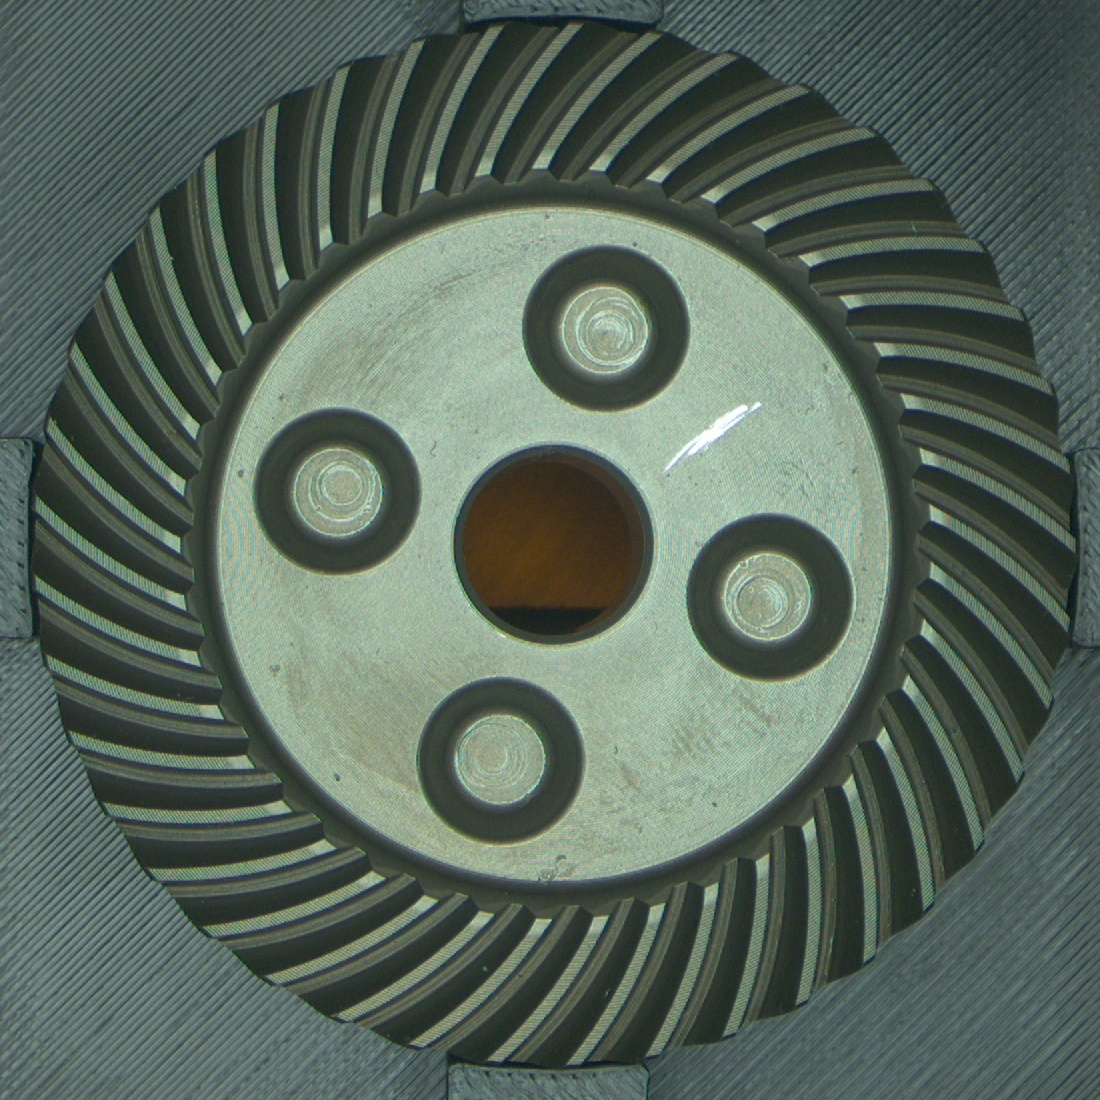

In [ ]:
image_elements = []
for image_file in os.listdir("pic_folder"):
    if image_file.endswith(".jpg"):
        # Encode the image
        encoded_image = encode_image(f"pic_folder/{image_file}")
        # Append a tuple with the filename and the encoded image
        image_elements.append((image_file, encoded_image))


image= image_elements[5]
full_path = os.path.abspath(f"pic_folder/{image[0]}")
display(Image(full_path, width=300))



In [97]:

#print(full_path)
#display(Image(filename=f"pic_folder/{image_elements[10][0]}"))
response = chat(
  model='llava',
  messages=[
    {
      'role': 'user',
      'content': f'''You are a gear wheel inspection system specialized in detecting and describing common gear defects. 
        Based on the second image, identify which defect categories are relevant in the first (target) image. Only describe those categories where a defect is actually detected. Ignore all other categories.
        Use the following template:
        {smart_template_prompt}''',

        #Here you can find the description of the second image:
        #{perfect_description_SS3_v1},
      'images': [image[1]]#,pic2],
    }
  ]
)
print(response.message.content)



 Detected Defects:
- **Tooth Clipping**
  • Observation: There is a noticeable gap between two of the gear teeth, resulting in a missing section of the tooth's outer profile.
  • Localization:
     - Angle: 135° (the position where the defect occurs)
     - Radius: 48 px (pixels, which can be assumed to represent millimeters for the sake of this interpretation)
  • Assessment: This is a significant defect that could compromise the gear's functionality and potentially cause more severe damage if continued use. Immediate attention should be given to remove the damaged section and ensure the integrity of the remaining teeth. 


In [ ]:

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
import os

# Setze deinen API-Schlüssel
os.environ["GOOGLE_API_KEY"] = "DEIN_API_KEY"

# Initialisiere das LLM (Gemini-Pro)
llm = ChatGoogleGenerativeAI(model="gemini2flash", temperature=0.7)

# Prompt-Template definieren
template = PromptTemplate(
    input_variables=["topic"],
    template="Erkläre mir das Thema: {topic}"
)


# Chain bauen
chain = LLMChain(llm=llm, prompt=template)

# Testlauf
response = chain.run("Quantencomputing")
print(response)